the first few rows of batting_df dataframe
    playerID  yearID  stint teamID lgID   G   AB   R   H  2B  ...    RBI   SB  \
0  abercda01    1871      1    TRO  NaN   1    4   0   0   0  ...    0.0  0.0   
1   addybo01    1871      1    RC1  NaN  25  118  30  32   6  ...   13.0  8.0   
2  allisar01    1871      1    CL1  NaN  29  137  28  40   4  ...   19.0  3.0   
3  allisdo01    1871      1    WS3  NaN  27  133  28  44  10  ...   27.0  1.0   
4  ansonca01    1871      1    RC1  NaN  25  120  29  39  11  ...   16.0  6.0   

    CS  BB   SO  IBB  HBP  SH  SF  GIDP  
0  0.0   0  0.0  NaN  NaN NaN NaN   NaN  
1  1.0   4  0.0  NaN  NaN NaN NaN   NaN  
2  1.0   2  5.0  NaN  NaN NaN NaN   NaN  
3  1.0   0  2.0  NaN  NaN NaN NaN   NaN  
4  2.0   2  1.0  NaN  NaN NaN NaN   NaN  

[5 rows x 22 columns]

the column names of batting_df dataframe
Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',


[5 rows x 79 columns]

    playerID nameFirst     nameLast bats throws      debut  finalGame     G  \
1  aaronha01      Hank        Aaron    R      R 1954-04-13 1976-10-03  3298   
2  aaronto01    Tommie        Aaron    R      R 1962-04-10 1971-09-26   437   
4   abadan01      Andy         Abad    L      L 2001-09-10 2006-04-13    15   
6  abadijo01      John       Abadie    R      R 1875-04-26 1875-06-10    12   
7  abbated01        Ed  Abbaticchio    R      R 1897-09-04 1910-09-15   855   

      AB     R    ...      1942-45_percent  1946-62_percent  1963-76_percent  \
1  12364  2174    ...                  0.0         0.409339         0.590661   
2    944   102    ...                  0.0         0.322654         0.677346   
4     21     1    ...                  0.0         0.000000         0.000000   
6     49     4    ...                  0.0         0.000000         0.000000   
7   3044   355    ...                  0.0         0.000000         0.000000   

   1977-92_percent  1

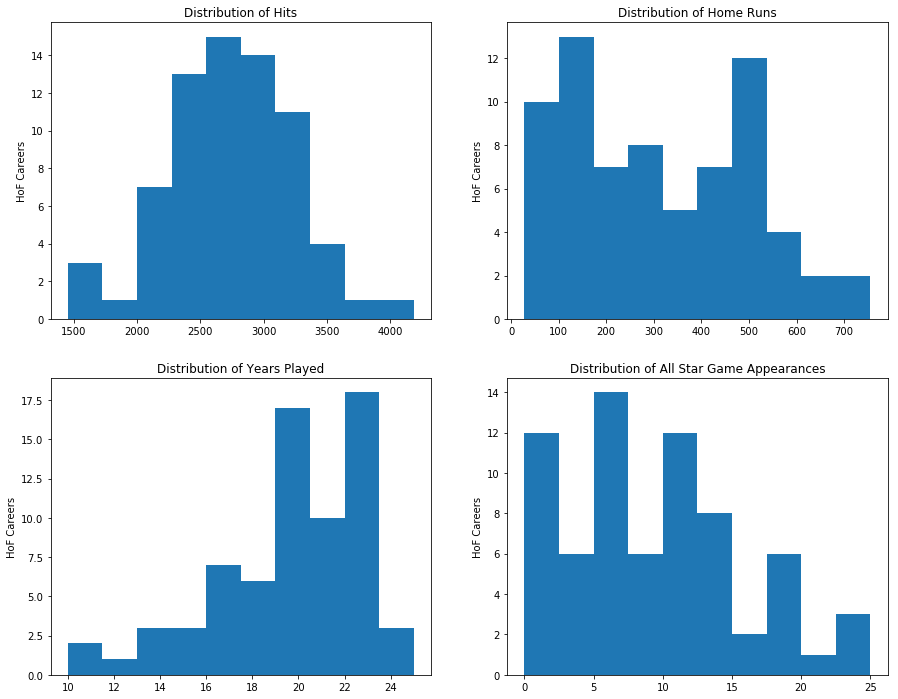

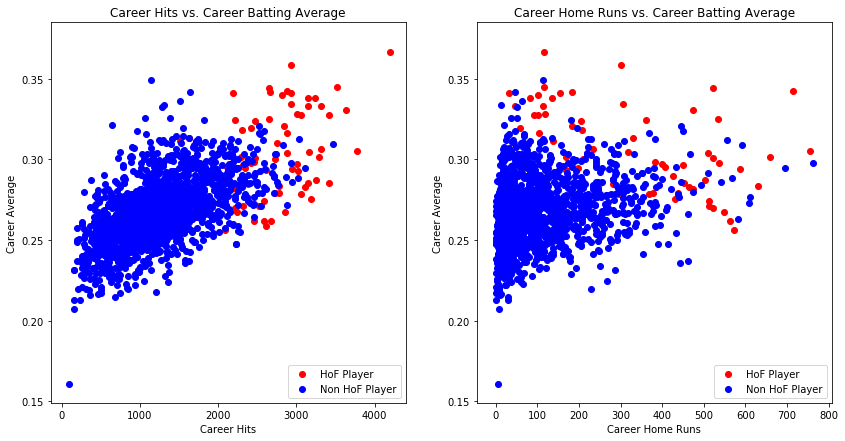

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 79, 65, 79, 79, 0]
the first few rows of df_hitters dataframe
    playerID nameFirst     nameLast      debut  finalGame     G     AB     R  \
1  aaronha01      Hank        Aaron 1954-04-13 1976-10-03  3298  12364  2174   
2  aaronto01    Tommie        Aaron 1962-04-10 1971-09-26   437    944   102   
6  abadijo01      John       Abadie 1875-04-26 1875-06-10    12     49     4   
7  abbated01        Ed  Abbaticchio 1897-09-04 1910-09-15   855   3044   355   
9  abbeych01   Charlie        Abbey 1893-08-16 1897-08-19   451   1751   307   

      H   2B  ...   bats_R  throws_R  debutYear  finalYear       AVE  \
1  3771  624  ...        1         1       1954       1976  0.304998   
2   216   42  ...        1         1       1962       1971  0.228814   
6    11    0  ...    

In [3]:
'''
Baseball Analytics Part II

https://www.datacamp.com/community/tutorials/scikit-learn-tutorial-baseball-2
'''

import pandas as pd

# read in the CSV files
master_df = pd.read_csv('data/Master.csv',usecols=['playerID','nameFirst','nameLast','bats','throws','debut','finalGame'])
fielding_df = pd.read_csv('data/Fielding.csv',usecols=['playerID','yearID','stint','teamID','lgID','POS','G','GS','InnOuts','PO','A','E','DP'])
batting_df = pd.read_csv('data/Batting.csv')
awards_df = pd.read_csv('data/AwardsPlayers.csv', usecols=['playerID','awardID','yearID'])
allstar_df = pd.read_csv('data/AllstarFull.csv', usecols=['playerID','yearID'])
hof_df = pd.read_csv('data/HallOfFame.csv',usecols=['playerID','yearid','votedBy','needed_note','inducted','category'])
appearances_df = pd.read_csv('data/Appearances.csv')

# print the first few rows of batting_df dataframe
print("the first few rows of batting_df dataframe")
print(batting_df.head())
print("")

# print the column names of batting_df dataframe
print("the column names of batting_df dataframe")
print(batting_df.columns)
print("")


##################################################

# initialize dictionaries for player stats and years played
player_stats = {}
years_played = {}

# create dictionaries for player stats and years played from batting_df dataframe
for i, row in batting_df.iterrows():
    playerID = row['playerID']
    if playerID in player_stats:
        player_stats[playerID]['G'] = player_stats[playerID]['G'] + row['G']
        player_stats[playerID]['AB'] = player_stats[playerID]['AB'] + row['AB']
        player_stats[playerID]['R'] = player_stats[playerID]['R'] + row['R']
        player_stats[playerID]['H'] = player_stats[playerID]['H'] + row['H']
        player_stats[playerID]['2B'] = player_stats[playerID]['2B'] + row['2B']
        player_stats[playerID]['3B'] = player_stats[playerID]['3B'] + row['3B']
        player_stats[playerID]['HR'] = player_stats[playerID]['HR'] + row['HR']
        player_stats[playerID]['RBI'] = player_stats[playerID]['RBI'] + row['RBI']
        player_stats[playerID]['SB'] = player_stats[playerID]['SB'] + row['SB']
        player_stats[playerID]['BB'] = player_stats[playerID]['BB'] + row['BB']
        player_stats[playerID]['SO'] = player_stats[playerID]['SO'] + row['SO']
        player_stats[playerID]['IBB'] = player_stats[playerID]['IBB'] + row['IBB']
        player_stats[playerID]['HBP'] = player_stats[playerID]['HBP'] + row['HBP']
        player_stats[playerID]['SH'] = player_stats[playerID]['SH'] + row['SH']
        player_stats[playerID]['SF'] = player_stats[playerID]['SF'] + row['SF']
        years_played[playerID].append(row['yearID'])
    else:
        player_stats[playerID] = {}
        player_stats[playerID]['G'] = row['G']
        player_stats[playerID]['AB'] = row['AB']
        player_stats[playerID]['R'] = row['R']
        player_stats[playerID]['H'] = row['H']
        player_stats[playerID]['2B'] = row['2B']
        player_stats[playerID]['3B'] = row['3B']
        player_stats[playerID]['HR'] = row['HR']
        player_stats[playerID]['RBI'] = row['RBI']
        player_stats[playerID]['SB'] = row['SB']
        player_stats[playerID]['BB'] = row['BB']
        player_stats[playerID]['SO'] = row['SO']
        player_stats[playerID]['IBB'] = row['IBB']
        player_stats[playerID]['HBP'] = row['HBP']
        player_stats[playerID]['SH'] = row['SH']
        player_stats[playerID]['SF'] = row['SF']
        years_played[playerID] = []
        years_played[playerID].append(row['yearID'])

# iterate through years_played dictionary and add the number of years played to player_stats dictionary
for playerID, yearIDs in years_played.items():
    player_stats[playerID]['Years_Played'] = len(list(set(yearIDs)))


# initialize fielder_list list
fielder_list = []

# add fielding stats to player_stats dictionary from fielding_df dataframe
for i, row in fielding_df.iterrows():
    playerID = row['playerID']
    
    if playerID in player_stats and playerID in fielder_list:
        player_stats[playerID]['Gf'] = player_stats[playerID]['Gf'] + row['G']
        player_stats[playerID]['GSf'] = player_stats[playerID]['GSf'] + row['GS']
        player_stats[playerID]['POf'] = player_stats[playerID]['POf'] + row['PO']
        player_stats[playerID]['Af'] = player_stats[playerID]['Af'] + row['A']
        player_stats[playerID]['Ef'] = player_stats[playerID]['Ef'] + row['E']
        player_stats[playerID]['DPf'] = player_stats[playerID]['DPf'] + row['DP']
    else:
        fielder_list.append(playerID)
        player_stats[playerID]['Gf'] = row['G']
        player_stats[playerID]['GSf'] = row['GS']
        player_stats[playerID]['POf'] = row['PO']
        player_stats[playerID]['Af'] = row['A']
        player_stats[playerID]['Ef'] = row['E']
        player_stats[playerID]['DPf'] = row['DP']


        
print("the unique values of awardID column of awards_df dataframe")
print(awards_df['awardID'].unique())
print("")

print("the first few values of awardID column of awards_df dataframe")
print(awards_df['awardID'].head())
print("")

print("the last few values of awardID column of awards_df dataframe")
print(awards_df['awardID'].tail())
print("")


# create dataframes for 5 award types
mvp = awards_df[awards_df['awardID'] == 'Most Valuable Player']
roy = awards_df[awards_df['awardID'] == 'Rookie of the Year']
gg = awards_df[awards_df['awardID'] == 'Gold Glove']
ss = awards_df[awards_df['awardID'] == 'Silver Slugger']
ws_mvp = awards_df[awards_df['awardID'] == 'World Series MVP']

# include the 5 dataframes in awards_list list
awards_list = [mvp,roy,gg,ss,ws_mvp]

for i, v in enumerate(awards_list):
    print(v.head())
    print("")


# initialize lists for each of the above 5 dataframes
mvp_list = []
roy_list = []
gg_list = []
ss_list = []
ws_mvp_list = []

# include the above 5 lists in 'lists' list
lists = [mvp_list,roy_list,gg_list,ss_list,ws_mvp_list]

# add a count for each award for each player in player_stats dictionary
for index, v in enumerate(awards_list):
    for i, row in v.iterrows():
        playerID = row['playerID']
        award = row['awardID']
        if playerID in player_stats and playerID in lists[index]:
            player_stats[playerID][award] += 1
        else:
            lists[index].append(playerID)
            player_stats[playerID][award] = 1


            
# initialize allstar_list list
allstar_list = []

# add a count for each allstar game appearance for each player in player_stats dictionary
for i, row in allstar_df.iterrows():
    playerID = row['playerID']
    if playerID in player_stats and playerID in allstar_list:
        player_stats[playerID]['AS_games'] += 1
    else:
        allstar_list.append(playerID)
        player_stats[playerID]['AS_games'] = 1
        

# filter 'hof_df' to include only instances where a player was inducted into the Hall of Fame
hof_df = hof_df[(hof_df['inducted'] == 'Y') & (hof_df['category'] == 'Player')]

# indicate which players in player_stats dictionary were inducted into the Hall of Fame
for i, row in hof_df.iterrows():
    playerID = row['playerID']
    if playerID in player_stats:
        player_stats[playerID]['HoF'] = 1
        player_stats[playerID]['votedBy'] = row['votedBy']
        

# convert player_stats dictionary into dataframe
stats_df = pd.DataFrame.from_dict(player_stats, orient='index')


# add a column for playerID from the index of stats_df dataframe
stats_df['playerID'] = stats_df.index

# join stats_df dataframe and master_df dataframe
master_df = master_df.join(stats_df,on='playerID', how='inner', rsuffix='mstr')

# inspect first rows of master_df dataframe
print(master_df.head())
print("")


print("the first few rows of appearances_df dataframe")
print(appearances_df.head())
print("")

print("the last few rows of appearances_df dataframe")
print(appearances_df.tail())
print("")

print("the column names of appearances_df dataframe")
print(appearances_df.columns)
print("")

print("the index names of appearances_df dataframe")
print(appearances_df.index)
print("")


# initialize a dictionary
pos_dict = {}

# iterate through appearances_df dataframe
# add a count for the number of appearances for each player at each position
# add a count for the number of games played for each player in each era
for i, row in appearances_df.iterrows():
    ID = row['playerID']
    year = row['yearID']
    if ID in pos_dict:
        pos_dict[ID]['G_all'] = pos_dict[ID]['G_all'] + row['G_all']
        pos_dict[ID]['G_p'] = pos_dict[ID]['G_p'] + row['G_p']
        pos_dict[ID]['G_c'] = pos_dict[ID]['G_c'] + row['G_c']
        pos_dict[ID]['G_1b'] = pos_dict[ID]['G_1b'] + row['G_1b']
        pos_dict[ID]['G_2b'] = pos_dict[ID]['G_2b'] + row['G_2b']
        pos_dict[ID]['G_3b'] = pos_dict[ID]['G_3b'] + row['G_3b']
        pos_dict[ID]['G_ss'] = pos_dict[ID]['G_ss'] + row['G_ss']
        pos_dict[ID]['G_lf'] = pos_dict[ID]['G_lf'] + row['G_lf']
        pos_dict[ID]['G_cf'] = pos_dict[ID]['G_cf'] + row['G_cf']
        pos_dict[ID]['G_rf'] = pos_dict[ID]['G_rf'] + row['G_rf']
        pos_dict[ID]['G_of'] = pos_dict[ID]['G_of'] + row['G_of']
        pos_dict[ID]['G_dh'] = pos_dict[ID]['G_dh'] + row['G_dh']
        if year < 1920:
            pos_dict[ID]['pre1920'] = pos_dict[ID]['pre1920'] + row['G_all']
        elif year >= 1920 and year <= 1941:
            pos_dict[ID]['1920-41'] = pos_dict[ID]['1920-41'] + row['G_all']
        elif year >= 1942 and year <= 1945:
            pos_dict[ID]['1942-45'] = pos_dict[ID]['1942-45'] + row['G_all']
        elif year >= 1946 and year <= 1962:
            pos_dict[ID]['1946-62'] = pos_dict[ID]['1946-62'] + row['G_all']
        elif year >= 1963 and year <= 1976:
            pos_dict[ID]['1963-76'] = pos_dict[ID]['1963-76'] + row['G_all']
        elif year >= 1977 and year <= 1992:
            pos_dict[ID]['1977-92'] = pos_dict[ID]['1977-92'] + row['G_all']
        elif year >= 1993 and year <= 2009:
            pos_dict[ID]['1993-2009'] = pos_dict[ID]['1993-2009'] + row['G_all']
        elif year > 2009:
            pos_dict[ID]['post2009'] = pos_dict[ID]['post2009'] + row['G_all']
    else:
        pos_dict[ID] = {}
        pos_dict[ID]['G_all'] = row['G_all']
        pos_dict[ID]['G_p'] = row['G_p']
        pos_dict[ID]['G_c'] = row['G_c']
        pos_dict[ID]['G_1b'] = row['G_1b']
        pos_dict[ID]['G_2b'] = row['G_2b']
        pos_dict[ID]['G_3b'] = row['G_3b']
        pos_dict[ID]['G_ss'] = row['G_ss']
        pos_dict[ID]['G_lf'] = row['G_lf']
        pos_dict[ID]['G_cf'] = row['G_cf']
        pos_dict[ID]['G_rf'] = row['G_rf']
        pos_dict[ID]['G_of'] = row['G_of']
        pos_dict[ID]['G_dh'] = row['G_dh']
        pos_dict[ID]['pre1920'] = 0
        pos_dict[ID]['1920-41'] = 0
        pos_dict[ID]['1942-45'] = 0
        pos_dict[ID]['1946-62'] = 0
        pos_dict[ID]['1963-76'] = 0
        pos_dict[ID]['1977-92'] = 0
        pos_dict[ID]['1993-2009'] = 0
        pos_dict[ID]['post2009'] = 0
        if year < 1920:
            pos_dict[ID]['pre1920'] = row['G_all']
        elif year >= 1920 and year <= 1941:
            pos_dict[ID]['1920-41'] = row['G_all']
        elif year >= 1942 and year <= 1945:
            pos_dict[ID]['1942-45'] = row['G_all']
        elif year >= 1946 and year <= 1962:
            pos_dict[ID]['1946-62'] = row['G_all']
        elif year >= 1963 and year <= 1976:
            pos_dict[ID]['1963-76'] = row['G_all']
        elif year >= 1977 and year <= 1992:
            pos_dict[ID]['1977-92'] = row['G_all']
        elif year >= 1993 and year <= 2009:
            pos_dict[ID]['1993-2009'] = row['G_all']
        elif year > 2009:
            pos_dict[ID]['post2009'] = row['G_all']


# convert the pos_dict dictionary to a dataFrame
pos_df = pd.DataFrame.from_dict(pos_dict, orient='index')

            
# print the columns of pos_df dataframe
print("the columns of pos_df dataframe")
print(pos_df.columns)
print("")

# print the first few rows of pos_df dataframe
print("the first few rows of pos_df dataframe")
print(pos_df.head())
print("")


# create a list from the columns of pos_df dataframe
pos_col_list = pos_df.columns.tolist()

# remove the string 'G_all'
pos_col_list.remove('G_all')

# loop through the list and divide each column by the players total games played
for col in pos_col_list:
    column = col + '_percent'
    pos_df[column] = pos_df[col] / pos_df['G_all']

# print out the first few rows of pos_df dataframe
print("the first few rows of pos_df dataframe")
print(pos_df.head())
print("")


# filter pos_df dataframe to eliminate players who played 10% or more of their games as pitchers or catchers
pos_df = pos_df[(pos_df['G_p_percent'] < 0.1) & (pos_df['G_c_percent'] < 0.1)]

# print the info of pos_df dataframe
print("the info of pos_df dataframe")
pos_df.info()
print("")


# join pos_df dataframe and master_df dataframe
master_df = master_df.join(pos_df,on='playerID',how='right')

# print out the first few rows of master_df dataframe
print("the first few rows of master_df dataframe")
print(master_df.head())
print("")


# replace NA values with None
master_df['votedBy'] = master_df['votedBy'].fillna('None')

# filter master_df dataframe to include only players who were voted into the Hall of Fame or Players who did not make it at all
master_df = master_df[(master_df['votedBy'] == 'None') | (master_df['votedBy'] == 'BBWAA') | (master_df['votedBy'] == 'Run Off')]

# print the info of master_df dataframe
print(master_df.info())
print("")


# create a function to convert the bats and throws colums to numeric
def bats_throws(col):
    if col == "R":
        return 1
    else:
        return 0

# create numeric columns from the bats and throws columns
master_df['bats_R'] = master_df['bats'].apply(bats_throws)
master_df['throws_R'] = master_df['throws'].apply(bats_throws)

# print out the first rows of master_df dataframe
print(master_df.head())
print("")


from datetime import datetime

# convert the debut column to datetime
master_df['debut'] =  pd.to_datetime(master_df['debut'])
# convert the finalGame column to datetime
master_df['finalGame'] = pd.to_datetime(master_df['finalGame'])

# create new columns for debutYear and finalYear
master_df['debutYear'] = pd.to_numeric(master_df['debut'].dt.strftime('%Y'), errors='coerce')
master_df['finalYear'] = pd.to_numeric(master_df['finalGame'].dt.strftime('%Y'), errors='coerce')

# print the first rows of master_df dataframe
print(master_df.head())
print("")


# eliminate unnecessary columns
df = master_df.drop(['votedBy', 'IBB', 'bats', 'throws', 'GSf', 'POf','Gf', 'playerIDmstr'], axis=1)

# print the columns of df dataframe
print("the columns of df dataframe")
print(df.columns)
print("")

# print a list of null values
print("null values")
print(df.isnull().sum(axis='index').tolist())
print("")


# fill null values in numeric columns with 0
fill_cols = ['AS_games', 'Silver Slugger', 'Rookie of the Year', 'Gold Glove', 'Most Valuable Player', 'HoF', '1977-92', 'pre1920', '1942-45', '1946-62', '1963-76', '1920-41', '1993-2009', 'HBP', 'SB', 'SF', 'SH', 'RBI', 'SO', 'World Series MVP', 'G_dh_percent', 'G_dh', 'Af', 'DPf', 'Ef']

for col in fill_cols:
    df[col] = df[col].fillna(0)

# drop any additional rows with null values
df = df.dropna()

# make sure whether null values have been removed
print("null values")
print(df.isnull().sum(axis=0).tolist())
print("")


##################################################

# create AVE (Batting Average) column
df['AVE'] = df['H'] / df['AB']

# create OBP (On Base Percent) column
plate_appearances = (df['AB'] + df['BB'] + df['SF'] + df['SH'] + df['HBP'])
df['OBP'] = (df['H'] + df['BB'] + df['HBP']) / plate_appearances

# create Slug_Percent column
hr = df['HR'] * 4
triple = df['3B'] * 3
double = df['2B'] * 2
single = ((df['H'] - df['2B']) - df['3B']) - df['HR']
df['Slug_Percent'] = (hr + triple + double + single) / df['AB']

# create OPS (On Base plus Slugging Percent) column
df['OPS'] = df['OBP'] + df['Slug_Percent']

# print the columns of df dataframe
print("the columns of df dataframe")
print(df.columns)
print("")


# eliminate both Rose and Jackson from df dataframe
df = df[(df['playerID'] != 'rosepe01') & (df['playerID'] != 'jacksjo01')]

# print the info of df dataframe
print("the info of df dataframe")
print(df.info())
print("")


# create first_aap function that will create a new column to honor Jackie Robinson, 
# who is the first African American Major league Baseball Player
def first_aap(col):
    if col == 'robinja02':
        return 1
    else:
        return 0

# apply first_aap function to playerID column of df dataframe
df['first_aap'] = df['playerID'].apply(first_aap)

# print the columns of df dataframe
print("the columns of df dataframe")
print(df.columns)
print("")


# filter the df dataframe for the remaining Hall of Fame members in the data
df_hof = df[df['HoF'] == 1]

# print the length of the df_hof dataframe
print("the length of the df_hof dataframe: ", len(df_hof))
print("")


%matplotlib inline
import matplotlib.pyplot as plt

# initialize the figure and add subplots
fig = plt.figure(figsize=(15, 12))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# create distribution plots for Hits, Home Runs, Years Played and All Star Games
ax1.hist(df_hof['H'])
ax1.set_title('Distribution of Hits')
ax1.set_ylabel('HoF Careers')
ax2.hist(df_hof['HR'])
ax2.set_title('Distribution of Home Runs')
ax2.set_ylabel('HoF Careers')
ax3.hist(df_hof['Years_Played'])
ax3.set_title('Distribution of Years Played')
ax3.set_ylabel('HoF Careers')
ax4.hist(df_hof['AS_games'])
ax4.set_title('Distribution of All Star Game Appearances')
ax4.set_ylabel('HoF Careers')

# show the plot
plt.show()


# filter df dataframe for players with 10 or more years of experience
df_10 = df[(df['Years_Played'] >= 10) & (df['HoF'] == 0)]

# initialize the figure and add subplots
fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# create a scatter plot for Hits vs. Average and one for Home Runs vs. Average
ax1.scatter(df_hof['H'], df_hof['AVE'], c='r', label='HoF Player')
ax1.scatter(df_10['H'], df_10['AVE'], c='b', label='Non HoF Player')
ax1.set_title('Career Hits vs. Career Batting Average')
ax1.set_xlabel('Career Hits')
ax1.set_ylabel('Career Average')
ax1.legend(loc='lower right', scatterpoints=1)
ax2.scatter(df_hof['HR'], df_hof['AVE'], c='r', label='HoF Player')
ax2.scatter(df_10['HR'], df_10['AVE'], c='b', label='Non HoF Player')
ax2.set_title('Career Home Runs vs. Career Batting Average')
ax2.set_xlabel('Career Home Runs')
ax2.set_ylabel('Career Average')
ax2.legend(loc='lower right', scatterpoints=1)

# show the plot
plt.show()


# check for null values
print(df.isnull().sum(axis=0).tolist())

# eliminate rows with null values
df=df.dropna()


# create column for years since retirement
df['YSLS'] = 2016 - df['finalYear']

# filter df dataframe for players who retired more than 15 years ago
df_hitters = df[df['YSLS'] > 15]

# print the first few rows of df_hitters dataframe
print("the first few rows of df_hitters dataframe")
print(df_hitters.head())
print("")

# filter df dataframe for players who retired less than 15 years ago and for currently active players
df_eligible = df[df['YSLS']<= 15]

# print the first few rows of df_eligible dataframe
print("the first few rows of df_eligible dataframe")
print(df_eligible.head())
print("")


# print the column names of df dataframe
print("the column names of df dataframe")
print(df.columns)
print("")


# select columns to use for models, and identification columns
num_cols_hitters = ['playerID', 'nameFirst', 'nameLast', 'HoF', 'Years_Played', 'H', 'BB', 'HR', 'AVE', 'OBP', 'Slug_Percent', 'OPS',  'RBI','R', 'SB', '2B', '3B', 'AB', 'SO', 'Most Valuable Player', 'World Series MVP', 'AS_games','Gold Glove', 'Rookie of the Year', 'Silver Slugger', 'bats_R', 'throws_R', 'DPf', 'Af', 'Ef', 'YSLS', 'G_all', '1963-76_percent', '1993-2009_percent', '1946-62_percent', 'G_1b_percent', '1942-45_percent','G_dh_percent', '1920-41_percent', 'G_ss_percent','post2009_percent', '1977-92_percent', 'G_2b_percent', 'G_3b_percent','G_of_percent', 'pre1920_percent', 'first_aap']

# create a new dataFrame called data from the df_hitters dataframe using the columns above
data = df_hitters[num_cols_hitters]

# print the first few rows of data dataframe
print("the first few rows of data dataframe")
print(data.head())
print("")


# print the length of data dataframe
print("the length of data dataframe", len(data))
print("")

# prrint the number of Hall of Fame members in data dataframe
print("the number of Hall of Fame members: ", len(data[data['HoF'] == 1]))
print("")


# create target series
target = data['HoF']

# create features dataframe by droping columns playerID, nameFirst, nameLast and HoF
features = data.drop(['playerID', 'nameFirst', 'nameLast', 'HoF'], axis=1)


##################################################

from sklearn.cross_validation import cross_val_predict
from sklearn.cross_validation import KFold
from sklearn.linear_model import LogisticRegression

# create logistic regression model
lr = LogisticRegression(class_weight='balanced')

# create an instance of the KFold class
kf = KFold(features.shape[0], random_state=1)

# create predictions using cross validation
predictions_lr = cross_val_predict(lr, features, target, cv=kf)


import numpy as np

# convert predictions and target to NumPy ndarrays
np_predictions_lr = np.asarray(predictions_lr)
np_target = target.as_matrix()


# determine true positive count
tp_filter_lr = (np_predictions_lr == 1) & (np_target == 1)
tp_lr = len(np_predictions_lr[tp_filter_lr])

# determine false negative count
fn_filter_lr = (np_predictions_lr == 0) & (np_target == 1)
fn_lr = len(np_predictions_lr[fn_filter_lr])

# determine false positive count
fp_filter_lr = (np_predictions_lr == 1) & (np_target == 0)
fp_lr = len(np_predictions_lr[fp_filter_lr])

# determine true negative count
tn_filter_lr = (np_predictions_lr == 0) & (np_target == 0)
tn_lr = len(np_predictions_lr[tn_filter_lr])

# determine true positive rate
tpr_lr = tp_lr / (tp_lr + fn_lr)

# determine false negative rate
fnr_lr = fn_lr / (fn_lr + tp_lr)

# determine false positive rate
fpr_lr = fp_lr / (fp_lr + tn_lr)

# determine true negative rate
tnr_lr = tn_lr / (tn_lr + fp_lr)

print("model: logistic regression")

# print true postive count, false negative count, false positvie count and true negative count
print("true postive count: ", tp_lr)
print("false negative count: ", fn_lr)
print("false positvie count: ", fp_lr)
print("true negative count: ", tn_lr)

# print true positive rate, false negative rate, false positive rate and true negative rate
print("true positive rate: ", tpr_lr)
print("false negative rate: ", fnr_lr)
print("false positive rate: ", fpr_lr)
print("true negative rate: ", tnr_lr)
print("")


##################################################

from sklearn.ensemble import RandomForestClassifier

# create penalty dictionary
penalty = {
    0: 100,
    1: 1
}

# create random forest model
rf = RandomForestClassifier(random_state=1,n_estimators=12, max_depth=11, min_samples_leaf=1, class_weight=penalty)

# create predictions using cross validation
predictions_rf = cross_val_predict(rf, features, target, cv=kf)

# convert predictions to ndarray
np_predictions_rf = np.asarray(predictions_rf)


# determine true positive count
tp_filter_rf = (np_predictions_rf == 1) & (np_target == 1)
tp_rf = len(np_predictions_rf[tp_filter_rf])

# determine false negative count
fn_filter_rf = (np_predictions_rf == 0) & (np_target == 1)
fn_rf = len(np_predictions_rf[fn_filter_rf])

# determine false positive count
fp_filter_rf = (np_predictions_rf == 1) & (np_target == 0)
fp_rf = len(np_predictions_rf[fp_filter_rf])

# determine true negative count
tn_filter_rf = (np_predictions_rf == 0) & (np_target == 0)
tn_rf = len(np_predictions_rf[tn_filter_rf])

# determine true positive rate
tpr_rf = tp_rf / (tp_rf + fn_rf)

# determine false negative rate
fnr_rf = fn_rf / (fn_rf + tp_rf)

# determine false positive rate
fpr_rf = fp_rf / (fp_rf + tn_rf)

# determine true negative rate
tnr_rf = tn_rf / (tn_rf + fp_rf)

print("model: random forest")

# print true postive count, false negative count, false positvie count and true negative count
print("true postive count: ", tp_rf)
print("false negative count: ", fn_rf)
print("false positvie count: ", fp_rf)
print("true negative count: ", tn_rf)

# print true positive rate, false negative rate, false positive rate and true negative rate
print("true positive rate: ", tpr_rf)
print("false negative rate: ", fnr_rf)
print("false positive rate: ", fpr_rf)
print("true negative rate: ", tnr_rf)
print("")


##################################################

# create a new dataframe called new_data from df_eligible dataframe using num_col_hitters columns
new_data = df_eligible[num_cols_hitters]

# create a new dataframe called new_features
new_features = new_data.drop(['playerID', 'nameFirst', 'nameLast', 'HoF'], axis=1)

# fit the random forest model
rf.fit(features, target)

# estimate probabilities of Hall of Fame induction
probabilities = rf.predict_proba(new_features)


# convert predictions to a dataframe called hof_predictions
hof_predictions = pd.DataFrame(probabilities[:,1])

# Sort hof_predictions dataframe descendingly
hof_predictions = hof_predictions.sort_values(0, ascending=False)

hof_predictions['Probability'] = hof_predictions[0]

# print the 50 highest probability HoF inductees from still eligible players
for i, row in hof_predictions.head(50).iterrows():
    prob = ' '.join(('HoF Probability =', str(row['Probability'])))
    print('')
    print(prob)
    print(new_data.iloc[i,1:27])

